In [148]:
!pip install datasets

In [149]:
from datasets import load_dataset
import numpy as np

In [150]:
ds1 = load_dataset("somosnlp-hackathon-2022/spanish-to-quechua")

In [151]:
ds1

DatasetDict({
    train: Dataset({
        features: ['es', 'qu'],
        num_rows: 102747
    })
    validation: Dataset({
        features: ['es', 'qu'],
        num_rows: 12844
    })
    test: Dataset({
        features: ['es', 'qu'],
        num_rows: 12843
    })
})

In [152]:
ds1['train']['es'][:10]

['Y por último dice que el pueblo de Dios “escapará, todo el que se halle escrito en el libro ”.',
 'b) ¿Cómo lograban mantenerse estos siervos de tiempo completo?',
 'Cabe señalar que solo la Biblia explica de manera satisfactoria cuál es el origen de los muchos idiomas que conocemos hoy.',
 'Pero al mismo tiempo nos advierte que “el amor al dinero es raíz de toda clase de males ”.',
 'Hoy, todo el que desea vivir de acuerdo con sus mandamientos considera que conmemorar el aniversario de la muerte de Cristo es de suma importancia.',
 'RESPUESTA: El Reino de Dios es un gobierno celestial, y su Rey es Jesús.',
 '¿CUÁL ES LA SOLUCIÓN?',
 'Adán y Eva desobedecieron a Dios, de modo que fueron expulsados del Edén.',
 'Sin embargo, poco después de escribir esa carta, los de la casa de Cloe le informaron de que en la congregación de Corinto había graves divisiones.',
 'Jesús cumplió de forma sorprendente esta profecía durante su ministerio.']

In [153]:
ds1['train']['qu'][:10]

['Ichaqa chaywanpas chay tiempopim llaqtamasikikuna librasqa kanqaku. Libropi qillqasqa sutiyuqkunam lliw librakunqaku ’, nispa (Dan.',
 '(2) ¿Imaynatam tukuy tiemponkuwan Diosta serviq punta cristianokunaqa mantienekuqku?',
 'Bibliallam allintapuni willawanchik imanasqam runakunaqa kunan tiempopi achka rimayniyoq kasqankuta.',
 'Ichaqa nintaqmi: “Qollqella kuyayqa tukuy mana allin ruraykunapa mamanmi ”, nispa.',
 'Kay tiempopipas Cristopa kamachisqanman hina kawsaqkunaqa ancha valorniyoqtam qawanku paypa wañukusqan punchaw yuyariytaqa.',
 'KUTICHIYNIN: Hanaq pachapi kaq huk gobiernom, kamachiqninñataqmi Jesus.',
 '¿IMATAM RURACHWAN?',
 'Adanwan Evaqa Jehová Diostam mana kasukurqakuchu, hinaspam Edenmanta qarqochikurqaku.',
 'Ichaqa chay carta qellqasqan qepamanmi Cloepa familian Pabloman willaykurqaku Corinto congregacionpi llumpay liryanakuy kasqanmanta.',
 'Jesusqa Isaiaspa nisqantam kay Pachapi Diospa munayninta ruraspan allinta cumplirqa.']

In [154]:
# ds_qu_sp = load_dataset("pollitoconpapass/cuzco-quechua-translation-spanish")

In [155]:
# ds_qu_sp

In [156]:
import unicodedata

def remove_accents_preserve_n(text: str) -> str:
    """
    Remove accents while preserving 'ñ' character.

    Args:
        text (str): Input text
    Returns:
        str: Text with accents removed but 'ñ' preserved

    Examples:
        >>> remove_accents_preserve_n("áéíóúñÁÉÍÓÚÑ")
        'aeiouñAEIOUN'
        >>> remove_accents_preserve_n("El niño está en la montaña")
        'El niño esta en la montaña'
    """
    # First, save all 'ñ' and 'Ñ' positions and characters
    n_positions = [(i, c) for i, c in enumerate(text) if c in 'ñÑ']

    # Decompose unicode characters into their base form and combining characters
    normalized = unicodedata.normalize('NFKD', text)

    # Remove combining characters (accents) except keep base characters
    result = ''.join(c for c in normalized if not unicodedata.combining(c))

    # Convert result to list for easier character replacement
    result_list = list(result)

    # Restore 'ñ' and 'Ñ' in their original positions
    for pos, char in n_positions:
        result_list[pos] = char

    return ''.join(result_list)

In [157]:
# ds_qu_sp['train']['spa'][:1]

In [158]:
# ds_qu_sp['train']['quz'][0:1]

In [159]:
# ds_qu_sp['train']['quz'][0].lower().find('a')

In [160]:
# sentence_spa = [remove_accents_preserve_n(sentence.lower()) for sentence in ds_qu_sp['train']['spa']]
# sentence_quz = [remove_accents_preserve_n(sentence.lower()) for sentence in ds_qu_sp['train']['quz']]

In [161]:
sentence_spa = [remove_accents_preserve_n(sentence.lower()) for sentence in ds1['train']['es']]
sentence_quz = [remove_accents_preserve_n(sentence.lower()) for sentence in ds1['train']['qu']]

In [162]:
len(sentence_spa)

102747

In [163]:
# START_TOKEN = '<START>'
# PADDING_TOKEN = '<PADDING>'
# END_TOKEN = '<END>'

# quechua_vocabulary = [START_TOKEN, ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/',
#                         '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
#                         ':', '<', '=', '>', '?', '@',
#                         'A', 'B', 'C', 'CH', 'CHH', 'CH’', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'KH', 'L', 'LL',
#                         'M', 'N', 'Ñ', 'O', 'P', 'PH', 'P’' 'Q', 'QH', 'Q’', 'R', 'S', 'SH', 'T', 'TH', 'T’', 'U', 'V', 'W', 'X',
#                         'Y', 'Z',
#                         '[', '\\', ']', '^', '_', '`',
#                         'a', 'b','c','ch', 'chh', 'CH’', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'kh', 'l', 'll',
#                         'm', 'n', 'ñ', 'o', 'p', 'ph', 'p’', 'q', 'qh', 'q’', 'r', 's', 'sh', 't', 'th', 't’', 'u', 'v', 'w', 'x',
#                         'y', 'z',
#                         '{', '|', '}', '~', PADDING_TOKEN, END_TOKEN]

# spanish_vocabulary = [START_TOKEN, ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/',
#                         '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
#                         ':', '<', '=', '>', '?', '@',
#                         'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
#                         'M', 'N', 'Ñ', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
#                         'Y', 'Z',
#                         '[', '\\', ']', '^', '_', '`',
#                         'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
#                         'm', 'n', 'ñ', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x',
#                         'y', 'z',
#                         '{', '|', '}', '~', PADDING_TOKEN, END_TOKEN]

In [164]:

START_TOKEN = '<START>'
PADDING_TOKEN = '<PADDING>'
END_TOKEN = '<END>'

quechua_vocabulary = [START_TOKEN, ' ', '!', '"', '”','’','“', '#', '$', '%', '&', "'",'‘', '(', ')', '*', '+', ',', '-', '.', '/',
                        '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                        ':', '<', '=', '>', '?', '¿', '@',
                        'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
                        'M', 'N', 'Ñ', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
                        'Y', 'Z',
                        '[', '\\', ']', '^', '_', '`',
                        'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
                        'm', 'n', 'ñ', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x',
                        'y', 'z',
                        '{', '|', '}', '~', PADDING_TOKEN, END_TOKEN]

spanish_vocabulary = [START_TOKEN, ' ', '!', '"', '”','’','“', '#', '$', '%', '&', "'",'‘', '(', ')', '*', '+', ',', '-', '.', '/',
                        '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                        ':', '<', '=', '>', '?', '¿', '@',
                        'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
                        'M', 'N', 'Ñ', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
                        'Y', 'Z',
                        '[', '\\', ']', '^', '_', '`',
                        'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
                        'm', 'n', 'ñ', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x',
                        'y', 'z',
                        '{', '|', '}', '~', PADDING_TOKEN, END_TOKEN]

In [165]:
PERCENTILE = 20
print( f"{PERCENTILE}th percentile length Kannada: {np.percentile([len(x) for x in sentence_quz], PERCENTILE)}" )
print( f"{PERCENTILE}th percentile length spanish: {np.percentile([len(x) for x in sentence_spa], PERCENTILE)}" )

20th percentile length Kannada: 41.0
20th percentile length spanish: 39.0


In [ ]:
y = [len(x) for x in sentence_spa]

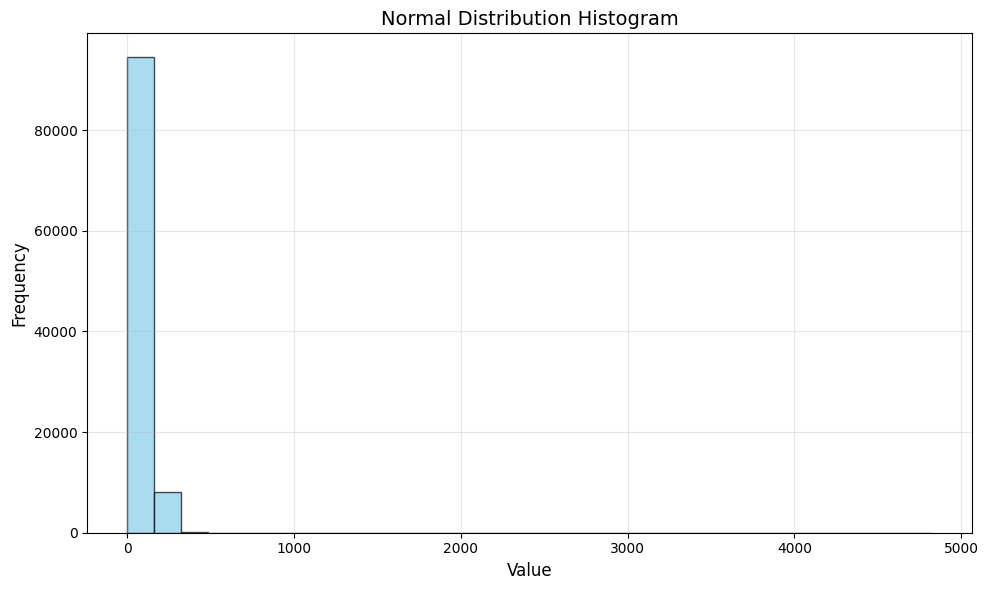

In [167]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
data = np.array(y)

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot histogram
plt.hist(data, bins=30, edgecolor='black', alpha=0.7, color='skyblue')

# Customize the plot
plt.title('Normal Distribution Histogram', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)

# Add some padding to the layout
plt.tight_layout()

# Show the plot
plt.show()

In [168]:
PERCENTILE = 97
print( f"{PERCENTILE}th percentile length Kannada: {np.max([len(x) for x in sentence_quz])}" )
print( f"{PERCENTILE}th percentile length spanish: {np.max([len(x) for x in sentence_spa])}" )

97th percentile length Kannada: 10905
97th percentile length spanish: 4826


In [169]:
# One-liner solution
max_index = max(enumerate(sentence_quz), key=lambda x: len(x[1]))[0]
max_length = len(sentence_quz[max_index])

print(f"Max length: {max_length}")
print(f"Index: {max_index}")
print(f"Word: {sentence_quz[max_index]}")

Max length: 10905
Index: 94047
Word: ¿sapa punchawchu diosta uyarinchik? yaqa llapallanchikmi punchawpi huk kutillatapas espejopi qawakunchik ¿aw? qawakunchikqa imayna allichasqa kasqanchikta yachananchikpaqmi. bibliata leeypas espejopi qawakuymanmi rikchakun. yachachikuyninmi qawachiwanchik cheqaptapuni imayna kasqanchikta. hebreos 4: 12, nisqanman hinaqa runapa “almankamaraqmi hinaspa espiritunkamaraqmi ” yaykun, huk rimaypiqa yanapawanchikmi imayna kasqanchiktapuni yachanapaq. espejo hinam bibliapas qawachiwanchik imakunapi cambianapaq. ichaqa manam imakunapi cambianallanchikmantachu bibliaqa niwanchik, niwanchiktaqmi imayna cambianamantapas. apostol pablom nirqa:“ bibliapi llapallan qellqasqa kaqkunaqa diospa espiritunpa qosqanmi, allinmi yachachiwananchikpaq, faltanchikkuna qawachiwananchikpaq, pantaypi puriptinchikpas allin ñanman kutirichiwananchikpaq hinaspa imaynam allin kawsakuy yachachiwananchikpaq ”, nispa. cuentata qokuptinchikqa bibliaqa yanapawanchikmi imayna kasqanchikp

In [170]:
index_to_quechua = {k:v for k,v in enumerate(quechua_vocabulary)}
quechua_to_index = {v:k for k,v in enumerate(quechua_vocabulary)}
index_to_spanish = {k:v for k,v in enumerate(spanish_vocabulary)}
spanish_to_index = {v:k for k,v in enumerate(spanish_vocabulary)}

In [171]:
qty_quechua = {k:sum(s.count(k) for s in sentence_quz) for k in quechua_vocabulary}
qty_quechua

{'<START>': 0,
 ' ': 833440,
 '!': 1435,
 '"': 0,
 '”': 10184,
 '’': 6733,
 '“': 10226,
 '#': 0,
 '$': 0,
 '%': 11,
 '&': 1,
 "'": 22,
 '‘': 6709,
 '(': 10148,
 ')': 11859,
 '*': 468,
 '+': 1,
 ',': 48753,
 '-': 8506,
 '.': 88603,
 '/': 878,
 '0': 6368,
 '1': 20635,
 '2': 11845,
 '3': 7183,
 '4': 5568,
 '5': 5198,
 '6': 3860,
 '7': 3788,
 '8': 3574,
 '9': 4482,
 ':': 20750,
 '<': 0,
 '=': 0,
 '>': 65,
 '?': 18846,
 '¿': 18693,
 '@': 0,
 'A': 0,
 'B': 0,
 'C': 0,
 'D': 0,
 'E': 0,
 'F': 0,
 'G': 0,
 'H': 0,
 'I': 0,
 'J': 0,
 'K': 0,
 'L': 0,
 'M': 0,
 'N': 0,
 'Ñ': 0,
 'O': 0,
 'P': 0,
 'Q': 0,
 'R': 0,
 'S': 0,
 'T': 0,
 'U': 0,
 'V': 0,
 'W': 0,
 'X': 0,
 'Y': 0,
 'Z': 0,
 '[': 2565,
 '\\': 0,
 ']': 2568,
 '^': 0,
 '_': 0,
 '`': 0,
 'a': 1704264,
 'b': 33389,
 'c': 269681,
 'd': 59680,
 'e': 137164,
 'f': 6515,
 'g': 18720,
 'h': 296169,
 'i': 612211,
 'j': 28541,
 'k': 425736,
 'l': 210212,
 'm': 317871,
 'n': 721486,
 'ñ': 40921,
 'o': 153406,
 'p': 326345,
 'q': 363736,
 'r': 2159

In [172]:
one_sentences_quz = ' '.join(sentence_quz)

In [173]:
one_sentences_quz = set(one_sentences_quz)

In [174]:
qty_quechua = {k:sum(s.count(k) for s in sentence_quz) for k in one_sentences_quz}
qty_quechua

{'u': 435772,
 '☞': 2,
 '5': 5198,
 '|': 112,
 ')': 11859,
 'd': 59680,
 '*': 468,
 '▪': 319,
 'ø': 1,
 '↑': 3,
 'l': 210212,
 ':': 20750,
 '•': 940,
 's': 336600,
 '\u2060': 7,
 '▸': 9,
 'f': 6515,
 '0': 6368,
 '©': 3,
 ';': 1781,
 'b': 33389,
 'י': 2,
 '●': 22,
 'p': 326345,
 'i': 612211,
 "'": 22,
 'e': 137164,
 'z': 3998,
 '◆': 114,
 '!': 1435,
 '□': 423,
 '8': 3574,
 'h': 296169,
 '¿': 18693,
 'm': 317871,
 'j': 28541,
 '(': 10148,
 '[': 2565,
 'פ': 2,
 '¡': 1404,
 '”': 10184,
 '“': 10226,
 '‘': 6709,
 '7': 3788,
 ',': 48753,
 'נ': 2,
 'a': 1704264,
 '4': 5568,
 'r': 215906,
 '’': 6733,
 '%': 11,
 '\u200b': 44,
 '◇': 7,
 '—': 69,
 '&': 1,
 'ש': 2,
 'c': 269681,
 'n': 721486,
 'v': 25263,
 '○': 8,
 '·': 12,
 ' ': 833440,
 '?': 18846,
 '>': 65,
 'y': 256919,
 'k': 425736,
 '-': 8506,
 '→': 2,
 '2': 11845,
 '.': 88603,
 'æ': 8,
 '°': 3,
 'o': 153406,
 '/': 878,
 'ו': 1,
 ']': 2568,
 'ה': 3,
 'ñ': 40921,
 'q': 363736,
 '\xad': 38,
 '3': 7183,
 '9': 4482,
 '\ufeff': 1,
 '+': 1,
 'g': 1

In [175]:
sentence_quz[:10]

['ichaqa chaywanpas chay tiempopim llaqtamasikikuna librasqa kanqaku. libropi qillqasqa sutiyuqkunam lliw librakunqaku ’, nispa (dan.',
 '(2) ¿imaynatam tukuy tiemponkuwan diosta serviq punta cristianokunaqa mantienekuqku?',
 'bibliallam allintapuni willawanchik imanasqam runakunaqa kunan tiempopi achka rimayniyoq kasqankuta.',
 'ichaqa nintaqmi: “qollqella kuyayqa tukuy mana allin ruraykunapa mamanmi ”, nispa.',
 'kay tiempopipas cristopa kamachisqanman hina kawsaqkunaqa ancha valorniyoqtam qawanku paypa wañukusqan punchaw yuyariytaqa.',
 'kutichiynin: hanaq pachapi kaq huk gobiernom, kamachiqninñataqmi jesus.',
 '¿imatam rurachwan?',
 'adanwan evaqa jehova diostam mana kasukurqakuchu, hinaspam edenmanta qarqochikurqaku.',
 'ichaqa chay carta qellqasqan qepamanmi cloepa familian pabloman willaykurqaku corinto congregacionpi llumpay liryanakuy kasqanmanta.',
 'jesusqa isaiaspa nisqantam kay pachapi diospa munayninta ruraspan allinta cumplirqa.']

In [176]:
search_term = 'bibliallam allintapuni willawanchik imanasqam runakunaqa kunan tiempopi achka rimayniyoq kasqankuta'

count = sum(s.count(search_term) for s in sentence_quz)
count

1

In [177]:
search_term = 'bibliallam allintapuni willawanchik imanasqam runakunaqa kunan tiempopi achka rimayniyoq kasqankuta'

count =[k for k,s in enumerate(sentence_quz) if s.find(search_term) >= 0 ]
count

[2]

In [178]:
max_sequence_length = 200
min_sequence_length = 30

def is_valid_tokens(sentence, vocab):
    for token in list(set(sentence)):
        if token not in vocab:
            return False
    return True

def is_valid_length(sentence, max_sequence_length, min_sequence_length):
    return (min_sequence_length - 1) < len(list(sentence)) < (max_sequence_length - 1) # need to re-add the end token so leaving 1 space

valid_sentence_indicies = []
for index in range(len(sentence_quz)):
    sentence_quz_, sentence_spa_ = sentence_quz[index], sentence_spa[index]
    if is_valid_length(sentence_quz_, max_sequence_length, min_sequence_length) \
      and is_valid_length(sentence_spa_, max_sequence_length,min_sequence_length) \
      and is_valid_tokens(sentence_quz_, quechua_vocabulary) \
      and is_valid_tokens(sentence_spa_, spanish_vocabulary) :
        valid_sentence_indicies.append(index)

print(f"Number of sentences: {len(sentence_spa)}")
print(f"Number of valid sentences: {len(valid_sentence_indicies)}")

Number of sentences: 102747
Number of valid sentences: 76837


In [179]:
sentence_quz = [sentence_quz[i] for i in valid_sentence_indicies]
sentence_spa = [sentence_spa[i] for i in valid_sentence_indicies]

In [180]:
len(sentence_spa)

76837

In [181]:
from transformer import Transformer # this is the transformer.py file
import torch
import numpy as np

In [182]:
import torch

d_model = 512
batch_size = 30
ffn_hidden = 2048
num_heads = 8
drop_prob = 0.1
num_layers = 1
max_sequence_length = 200
kn_vocab_size = len(sentence_quz)

transformer = Transformer(d_model,
                          ffn_hidden,
                          num_heads,
                          drop_prob,
                          num_layers,
                          max_sequence_length,
                          kn_vocab_size,
                          spanish_to_index,
                          quechua_to_index,
                          START_TOKEN,
                          END_TOKEN,
                          PADDING_TOKEN)

In [183]:
from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):

    def __init__(self, sentence_spa, sentence_quz):
        self.sentence_spa = sentence_spa
        self.sentence_quz = sentence_quz

    def __len__(self):
        return len(self.sentence_spa)

    def __getitem__(self, idx):
        return self.sentence_spa[idx], self.sentence_quz[idx]

In [184]:
dataset = TextDataset(sentence_spa, sentence_quz)

In [185]:
len(dataset)

76837

In [186]:
dataset[1]

('b) ¿como lograban mantenerse estos siervos de tiempo completo?',
 '(2) ¿imaynatam tukuy tiemponkuwan diosta serviq punta cristianokunaqa mantienekuqku?')

In [187]:
train_loader = DataLoader(dataset, batch_size)
iterator = iter(train_loader)

In [188]:
for batch_num, batch in enumerate(iterator):
    print(batch)
    if batch_num > 3:
        break

[('y por ultimo dice que el pueblo de dios “escapara, todo el que se halle escrito en el libro ”.', 'b) ¿como lograban mantenerse estos siervos de tiempo completo?', 'cabe señalar que solo la biblia explica de manera satisfactoria cual es el origen de los muchos idiomas que conocemos hoy.', 'pero al mismo tiempo nos advierte que “el amor al dinero es raiz de toda clase de males ”.', 'hoy, todo el que desea vivir de acuerdo con sus mandamientos considera que conmemorar el aniversario de la muerte de cristo es de suma importancia.', 'respuesta: el reino de dios es un gobierno celestial, y su rey es jesus.', 'adan y eva desobedecieron a dios, de modo que fueron expulsados del eden.', 'sin embargo, poco despues de escribir esa carta, los de la casa de cloe le informaron de que en la congregacion de corinto habia graves divisiones.', 'jesus cumplio de forma sorprendente esta profecia durante su ministerio.', 'cierto diccionario biblico lo define como “fortaleza espiritual, emocional y moral

In [189]:
from torch import nn

criterian = nn.CrossEntropyLoss(ignore_index=quechua_to_index[PADDING_TOKEN],
                                reduction='none')

# When computing the loss, we are ignoring cases when the label is the padding token
for params in transformer.parameters():
    if params.dim() > 1:
        nn.init.xavier_uniform_(params)

optim = torch.optim.Adam(transformer.parameters(), lr=1e-4)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [190]:
NEG_INFTY = -1e9

def create_masks(eng_batch, kn_batch):
    num_sentences = len(eng_batch)
    look_ahead_mask = torch.full([max_sequence_length, max_sequence_length] , True)
    look_ahead_mask = torch.triu(look_ahead_mask, diagonal=1)
    encoder_padding_mask = torch.full([num_sentences, max_sequence_length, max_sequence_length] , False)
    decoder_padding_mask_self_attention = torch.full([num_sentences, max_sequence_length, max_sequence_length] , False)
    decoder_padding_mask_cross_attention = torch.full([num_sentences, max_sequence_length, max_sequence_length] , False)

    for idx in range(num_sentences):
      eng_sentence_length, kn_sentence_length = len(eng_batch[idx]), len(kn_batch[idx])
      eng_chars_to_padding_mask = np.arange(eng_sentence_length + 1, max_sequence_length)
      kn_chars_to_padding_mask = np.arange(kn_sentence_length + 1, max_sequence_length)
      encoder_padding_mask[idx, :, eng_chars_to_padding_mask] = True
      encoder_padding_mask[idx, eng_chars_to_padding_mask, :] = True
      decoder_padding_mask_self_attention[idx, :, kn_chars_to_padding_mask] = True
      decoder_padding_mask_self_attention[idx, kn_chars_to_padding_mask, :] = True
      decoder_padding_mask_cross_attention[idx, :, eng_chars_to_padding_mask] = True
      decoder_padding_mask_cross_attention[idx, kn_chars_to_padding_mask, :] = True

    encoder_self_attention_mask = torch.where(encoder_padding_mask, NEG_INFTY, 0)
    decoder_self_attention_mask =  torch.where(look_ahead_mask + decoder_padding_mask_self_attention, NEG_INFTY, 0)
    decoder_cross_attention_mask = torch.where(decoder_padding_mask_cross_attention, NEG_INFTY, 0)
    return encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask

In [ ]:
transformer.train()

transformer.to(device)
total_loss = 0
num_epochs = 20

for epoch in range(num_epochs):
    print(f"Epoch {epoch}")
    iterator = iter(train_loader)
    for batch_num, batch in enumerate(iterator):
        transformer.train()
        eng_batch, kn_batch = batch
        encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask = create_masks(eng_batch, kn_batch)
        optim.zero_grad()
        kn_predictions = transformer(eng_batch,
                                     kn_batch,
                                     encoder_self_attention_mask.to(device),
                                     decoder_self_attention_mask.to(device),
                                     decoder_cross_attention_mask.to(device),
                                     enc_start_token=False,
                                     enc_end_token=False,
                                     dec_start_token=True,
                                     dec_end_token=True)
        labels = transformer.decoder.sentence_embedding.batch_tokenize(kn_batch, start_token=False, end_token=True)
        loss = criterian(
            kn_predictions.view(-1, kn_vocab_size).to(device),
            labels.view(-1).to(device)
        ).to(device)
        valid_indicies = torch.where(labels.view(-1) == quechua_to_index[PADDING_TOKEN], False, True)
        loss = loss.sum() / valid_indicies.sum()
        loss.backward()
        optim.step()
        #train_losses.append(loss.item())
        if batch_num % 400 == 0:
            print(f"Iteration {batch_num} : {loss.item()}")
            print(f"Español: {eng_batch[0]}")
            print(f"quechua Translation: {kn_batch[0]}")
            kn_sentence_predicted = torch.argmax(kn_predictions[0], axis=1)
            predicted_sentence = ""
            for idx in kn_sentence_predicted:
              if idx == quechua_to_index[END_TOKEN]:
                break
              # print(idx.item())

              predicted_sentence += index_to_quechua[idx.item()]

              # if idx.item() in index_to_quechua:
              #   predicted_sentence += index_to_quechua[idx.item()]
              # else:
              #   # You can choose to ignore the unknown token or replace it with a special token
              #   predicted_sentence += "<UNK>" # Replace with unknown token placeholder
              #   # Alternatively, you could skip this token:
              #   # pass

            print(f"quechua Prediction: {predicted_sentence}")

            transformer.eval()
            kn_sentence = ("",)
            spa_sentence = ("me gusta el pan con queso",)
            for word_counter in range(max_sequence_length):
                encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask= create_masks(spa_sentence, kn_sentence)
                predictions = transformer(spa_sentence,
                                          kn_sentence,
                                          encoder_self_attention_mask.to(device),
                                          decoder_self_attention_mask.to(device),
                                          decoder_cross_attention_mask.to(device),
                                          enc_start_token=False,
                                          enc_end_token=False,
                                          dec_start_token=True,
                                          dec_end_token=False)
                next_token_prob_distribution = predictions[0][word_counter] # not actual probs
                next_token_index = torch.argmax(next_token_prob_distribution).item()
                next_token = index_to_quechua[next_token_index]
                kn_sentence = (kn_sentence[0] + next_token, )
                if next_token == END_TOKEN:
                  break

            print(f"Evaluation translation ({spa_sentence} / Quesoyuq tanta gustan) : {kn_sentence}")
            print("-------------------------------------------")

Epoch 0
Iteration 0 : 10.773098945617676
Español: y por ultimo dice que el pueblo de dios “escapara, todo el que se halle escrito en el libro ”.
quechua Translation: ichaqa chaywanpas chay tiempopim llaqtamasikikuna librasqa kanqaku. libropi qillqasqa sutiyuqkunam lliw librakunqaku ’, nispa (dan.
quechua Prediction: aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
Evaluation translation (('me gusta el pan con queso',) / Quesoyuq tanta gustan) : ('aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',)
-------------------------------------------
Iteration 400 : 2.5641300678253174
Español: cinco cuestiones dignas de analisis, publicado tambien en el 2010.
quechua Translation: chaymi iñiyninkup

In [ ]:
# Method 1: Save only the model state dict (recommended for most cases)
torch.save(transformer.state_dict(), 'model_state3.pth')

# Method 2: Save the entire model
torch.save(transformer, 'entire_model3.pth')


In [ ]:
print(transformer.state_dict().keys())

odict_keys(['encoder.sentence_embedding.embedding.weight', 'encoder.layers.0.attention.qkv_layer.weight', 'encoder.layers.0.attention.qkv_layer.bias', 'encoder.layers.0.attention.linear_layer.weight', 'encoder.layers.0.attention.linear_layer.bias', 'encoder.layers.0.norm1.gamma', 'encoder.layers.0.norm1.beta', 'encoder.layers.0.ffn.linear1.weight', 'encoder.layers.0.ffn.linear1.bias', 'encoder.layers.0.ffn.linear2.weight', 'encoder.layers.0.ffn.linear2.bias', 'encoder.layers.0.norm2.gamma', 'encoder.layers.0.norm2.beta', 'decoder.sentence_embedding.embedding.weight', 'decoder.layers.0.self_attention.qkv_layer.weight', 'decoder.layers.0.self_attention.qkv_layer.bias', 'decoder.layers.0.self_attention.linear_layer.weight', 'decoder.layers.0.self_attention.linear_layer.bias', 'decoder.layers.0.layer_norm1.gamma', 'decoder.layers.0.layer_norm1.beta', 'decoder.layers.0.encoder_decoder_attention.kv_layer.weight', 'decoder.layers.0.encoder_decoder_attention.kv_layer.bias', 'decoder.layers.0.e

In [ ]:
transformer.eval()
def translate(eng_sentence):
  eng_sentence = (eng_sentence,)
  kn_sentence = ("",)
  for word_counter in range(max_sequence_length):
    encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask= create_masks(eng_sentence, kn_sentence)
    predictions = transformer(eng_sentence,
                              kn_sentence,
                              encoder_self_attention_mask.to(device),
                              decoder_self_attention_mask.to(device),
                              decoder_cross_attention_mask.to(device),
                              enc_start_token=False,
                              enc_end_token=False,
                              dec_start_token=True,
                              dec_end_token=False)
    next_token_prob_distribution = predictions[0][word_counter]
    next_token_index = torch.argmax(next_token_prob_distribution).item()
    next_token = index_to_quechua[next_token_index]
    kn_sentence = (kn_sentence[0] + next_token, )
    if next_token == END_TOKEN:
      break
  return kn_sentence[0]

In [ ]:
transformer

Transformer(
  (encoder): Encoder(
    (sentence_embedding): SentenceEmbedding(
      (embedding): Embedding(99, 512)
      (position_encoder): PositionalEncoding()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): SequentialEncoder(
      (0): EncoderLayer(
        (attention): MultiHeadAttention(
          (qkv_layer): Linear(in_features=512, out_features=1536, bias=True)
          (linear_layer): Linear(in_features=512, out_features=512, bias=True)
        )
        (norm1): LayerNormalization()
        (dropout1): Dropout(p=0.1, inplace=False)
        (ffn): PositionwiseFeedForward(
          (linear1): Linear(in_features=512, out_features=2048, bias=True)
          (linear2): Linear(in_features=2048, out_features=512, bias=True)
          (relu): ReLU()
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (norm2): LayerNormalization()
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (decoder): Decoder(
    (sentence_embedding):

In [ ]:
translation = translate("quiero volar contigo")
print(translation)

kaytam willakunapaq<END>
